Exploring the SDSS data we downloaded.

In [16]:
import numpy as np
from astropy.io import fits
import os, sys
from matplotlib import pyplot as plt

In [2]:
os.listdir("../data/")

['galaxy_DR12v5_CMASS_North.fits',
 'galaxy_DR12v5_CMASS_North.fits.gz',
 '.DS_Store',
 'galaxy_DR12v5_CMASS_South.fits',
 'README.md',
 'galaxy_DR12v5_CMASS_South.fits.gz']

Data exists in two sections, one for each hemisphere

In [30]:
with fits.open("../data/galaxy_DR12v5_CMASS_North.fits") as hdul:
    thead, tdata = hdul[1].header, hdul[1].data
    print(tdata.shape)
    
with fits.open("../data/galaxy_DR12v5_CMASS_South.fits") as hdul:
    tdata = np.append(tdata, hdul[1].data)
    print(hdul[1].data.shape)
    print(tdata.shape)
    
thead

(618806,)
(230831,)
(849637,)


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  362 / width of table in bytes                        
NAXIS2  =               618806 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   42 / number of fields in each row                   
TTYPE1  = 'RA      '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'DEC     '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'RUN     '        

In [31]:
tdata.shape

(849637,)

In [27]:
tdata.dtype.names

('RA',
 'DEC',
 'RUN',
 'RERUN',
 'CAMCOL',
 'FIELD',
 'ID',
 'ICHUNK',
 'IPOLY',
 'ISECT',
 'FRACPSF',
 'EXPFLUX',
 'DEVFLUX',
 'PSFFLUX',
 'MODELFLUX',
 'FIBER2FLUX',
 'R_DEV',
 'EXTINCTION',
 'PSF_FWHM',
 'AIRMASS',
 'SKYFLUX',
 'EB_MINUS_V',
 'IMAGE_DEPTH',
 'IMATCH',
 'Z',
 'WEIGHT_FKP',
 'WEIGHT_CP',
 'WEIGHT_NOZ',
 'WEIGHT_STAR',
 'WEIGHT_SEEING',
 'WEIGHT_SYSTOT',
 'NZ',
 'COMP',
 'PLATE',
 'FIBERID',
 'MJD',
 'FINALN',
 'TILE',
 'SPECTILE',
 'ICOLLIDED',
 'INGROUP',
 'MULTGROUP')

Plot LOWZ data too for comparison.

In [32]:
with fits.open("../data/galaxy_DR12v5_LOWZ_North.fits") as hdul:
    lowzdata = hdul[1].data
    print(lowzdata.shape)
    
with fits.open("../data/galaxy_DR12v5_LOWZ_South.fits") as hdul:
    lowzdata = np.append(lowzdata, hdul[1].data)
    print(hdul[1].data.shape)
    print(lowzdata.shape)

(317780,)
(145264,)
(463044,)


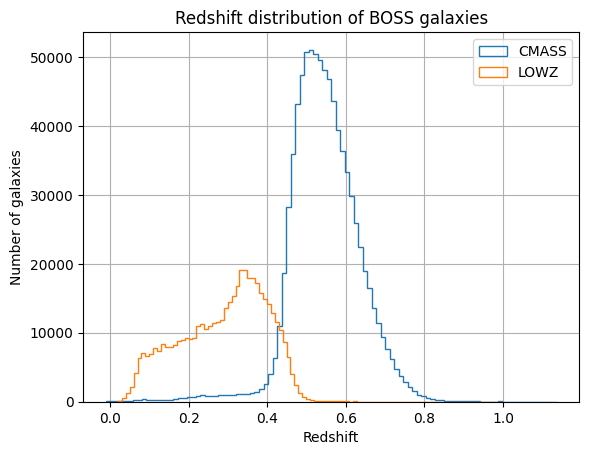

In [35]:
plt.figure()
plt.hist(tdata['Z'], bins=100, histtype='step', label='CMASS')
plt.hist(lowzdata['Z'], bins=100, histtype='step', label='LOWZ')
plt.title('Redshift distribution of BOSS galaxies')
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.legend()
plt.grid()
plt.show()
plt.close()